# Grid Search 

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [55]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     KFold,GridSearchCV)

In [5]:
iris = load_iris()
X, y = iris['data'], iris['target']


### Simple Grid Search

In [6]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

print(f"Size of training set: {X_train.shape[0]} size of test set: {X_test.shape[0]}")
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_estimator = {'Gamma':gamma, 'C':C}
print(f'Best score : {best_score:.2f}')
print(f'Best estimator : {best_estimator}')

Size of training set: 112 size of test set: 38
Best score : 0.95
Best estimator : {'Gamma': 0.01, 'C': 100}


### Splitting the dataset into 3-sets

In [7]:
# split into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=7)

# split the train+validation set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=7)

print(f"Size of training set: {X_train.shape[0]}") 
print(f'size of validation set: {X_valid.shape[0]}')
print(f"size of test set : {X_test.shape[0]}")

best_score = 0

for gamma in [0.001, 0.01, 1, 10, 100]:
    for C in [0.001, 0.01, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma).fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_estimator = {'gamma':gamma, 'C':C}

print(f'Best score : {best_score}')
print(f'Best estimator : {best_estimator}')
    

Size of training set: 84
size of validation set: 28
size of test set : 38
Best score : 1.0
Best estimator : {'gamma': 0.001, 'C': 100}


In [8]:
svm = SVC(**best_estimator).fit(X_trainval, y_trainval)
svm.score(X_test, y_test)

0.9210526315789473

### Grid search with cross-validation

In [9]:
best_score = 0

for gamma in [0.001, 0.01, 1, 10, 100]:
    for C in [0.001, 0.01, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svc, X_trainval, y_trainval, cv=5)
        np.mean(scores)
        if score > best_score:
            best_score = score
            best_estimator = {'gamma':gamma, 'C':C}
            
print(f'Score {score}')
print(f'Score mean {scores.mean()}')

svc = SVC(**best_estimator).fit(X_train, y_train)
svc.score(X_test, y_test)

Score 0.35714285714285715
Score mean 0.625296442687747


0.34210526315789475

### GridSearchCV

Using scikit-learn grid search estimator

In [61]:
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}

kfold = KFold(n_splits=5, shuffle=False)

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
print(f'Score : {grid_search.score(X_test, y_test)}')

Score : 1.0


In [63]:
print(f'The best combination : {grid_search.best_params_}')
print(f'The best score : {grid_search.best_score_}')

The best combination : {'C': 100, 'gamma': 0.01}
The best score : 0.9818181818181818


Viewing the result of the GridSearchCV

In [64]:
results =pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000941,0.000124,0.000409,0.000038,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.391304,0.608696,0.227273,0.136364,0.454545,0.363636,0.166932,26
1,0.000974,0.000161,0.000423,0.000065,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.391304,0.608696,0.227273,0.136364,0.454545,0.363636,0.166932,26
2,0.000845,0.000008,0.000374,0.000018,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.391304,0.652174,0.227273,0.136364,0.454545,0.372332,0.180085,24
3,0.000853,0.000019,0.000373,0.000007,0.001,1,"{'C': 0.001, 'gamma': 1}",0.391304,0.695652,0.227273,0.136364,0.454545,0.381028,0.193907,22
4,0.000869,0.000014,0.000366,0.000004,0.001,10,"{'C': 0.001, 'gamma': 10}",0.391304,0.608696,0.227273,0.136364,0.454545,0.363636,0.166932,26
5,0.000952,0.000123,0.000386,0.000028,0.001,100,"{'C': 0.001, 'gamma': 100}",0.391304,0.434783,0.227273,0.136364,0.363636,0.310672,0.111399,34
6,0.000852,0.000048,0.000370,0.000008,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.391304,0.608696,0.227273,0.136364,0.454545,0.363636,0.166932,26
7,0.000846,0.000024,0.000376,0.000013,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.391304,0.608696,0.227273,0.136364,0.454545,0.363636,0.166932,26
8,0.000900,0.000062,0.000423,0.000051,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.391304,0.652174,0.227273,0.136364,0.454545,0.372332,0.180085,24
9,0.000870,0.000052,0.000419,0.000092,0.01,1,"{'C': 0.01, 'gamma': 1}",0.391304,0.695652,0.227273,0.136364,0.454545,0.381028,0.193907,22


Viewing the mean scores as a heatmap

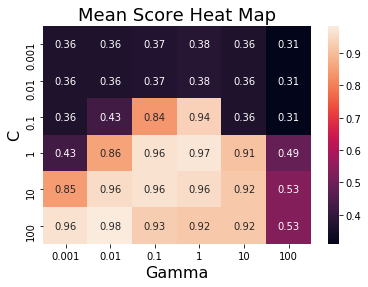

In [93]:
score = np.array(results.mean_test_score).reshape(6,6)

sns.heatmap(score, annot=True, xticklabels=param_grid['gamma'], 
            yticklabels=param_grid["C"])
plt.title('Mean Score Heat Map', fontsize=18, loc='center')
plt.xlabel('Gamma', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.show()